In [11]:
import random
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML

In [12]:
ins = BrainSpan()
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta.age.unique()
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
#print bp_exon_col_meta.shape
display(bp_exon_col_meta.head(2)) 
#print "Sample size", pd.unique(bp_exon_col_meta.donor_id).size
#print "Periods:",bp_exon_col_meta.drop_duplicates("donor_id").groupby("Period")["Period"].count()
strcture_count = bp_exon_col_meta.groupby("structure_acronym")["structure_acronym"].count()
Regions = bp_exon_col_meta.drop_duplicates("structure_acronym")[["structure_id","structure_acronym","structure_name"]]
Regions["sample count"] = Regions.apply(lambda row: strcture_count[row["structure_acronym"]], axis=1)
Regions.to_excel("../data/expression/brainspan/exons_matrix/Regions.xlsx", index=False)
# Rows Meta Data
bp_exon_row_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv", delimiter=",")
bp_exon_row_meta["exon length"] = bp_exon_row_meta["end"] - bp_exon_row_meta["start"]
display(bp_exon_row_meta.head(2))
ExonExp = pd.read_csv("../data/expression/brainspan/exons_matrix/expression_matrix.csv", header=None)
display(ExonExp.head(2))
# Exon RPKM Norm by Gene RPKM
NormExonExp = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/NormedExonExpMatrix.csv", header = None)
NormExonExp.head(2)

,column_num,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,Period,Stage,Description
0,1,13058,H376.IIA.51,8 pcw,M,10665,URL,upper (rostral) rhombic lip,2A,2,Early prenatal
1,2,13058,H376.IIA.51,8 pcw,M,10194,OFC,orbital frontal cortex,2A,2,Early prenatal


,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end,exon length
0,1,1086864,ENSG00000000003,TSPAN6,7105.0,99883666,99884983,1317
1,2,1086864,ENSG00000000003,TSPAN6,7105.0,99885755,99885863,108


,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,13.636583,40.862901,32.178981,27.939465,29.324584,23.885710,24.887880,16.432391,45.570680,...,4.347437,4.101772,2.987192,3.862508,3.362597,2.566516,3.049593,5.025746,1.893471,8.942586
1,2,31.731240,86.587706,60.131360,57.718046,58.326412,54.090394,50.138146,35.408905,94.937737,...,6.332389,5.479924,5.946744,6.017439,5.585987,3.870925,4.083335,7.451925,2.946266,3.868906


,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,0.92888,0.994602,1.163014,1.058665,0.973158,1.077006,1.026251,0.991086,1.055019,...,1.260625,1.330526,1.289509,1.307571,1.108135,1.232750,1.339092,1.442238,1.217121,1.856548
1,2,2.16143,2.107543,2.173270,2.187017,1.935605,2.438935,2.067446,2.135616,2.197930,...,1.836202,1.777569,2.567087,2.037077,1.840848,1.859284,1.793013,2.138479,1.893857,0.803214


In [15]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
Regions = ["OFC", "VFC", "ITC", "DFC", "STC", "MFC"]

In [24]:
SynVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014ProSYN.xlsx"
syn_annotated_exon_row_meta = ins.AssignVar2Exon2(bp_exon_row_meta, SynVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_syn_with_gene = syn_annotated_exon_row_meta[syn_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_syn_with_gene.to_excel("GenesExonsTargetedBySYN.xlsx", index=False)
bp_exon_row_meta_syn_with_var = bp_exon_row_meta_syn_with_gene[bp_exon_row_meta_syn_with_gene["Vars"]!=""]
bp_exon_row_meta_syn_without_var = bp_exon_row_meta_syn_with_gene[bp_exon_row_meta_syn_with_gene["Vars"]==""]
print bp_exon_row_meta_syn_with_gene.shape, bp_exon_row_meta_syn_with_var.shape, bp_exon_row_meta_syn_without_var.shape

309222(12454, 15) (615, 15) (11839, 15)


Targeted
Loading records:614
Untargeted
Loading records:1999


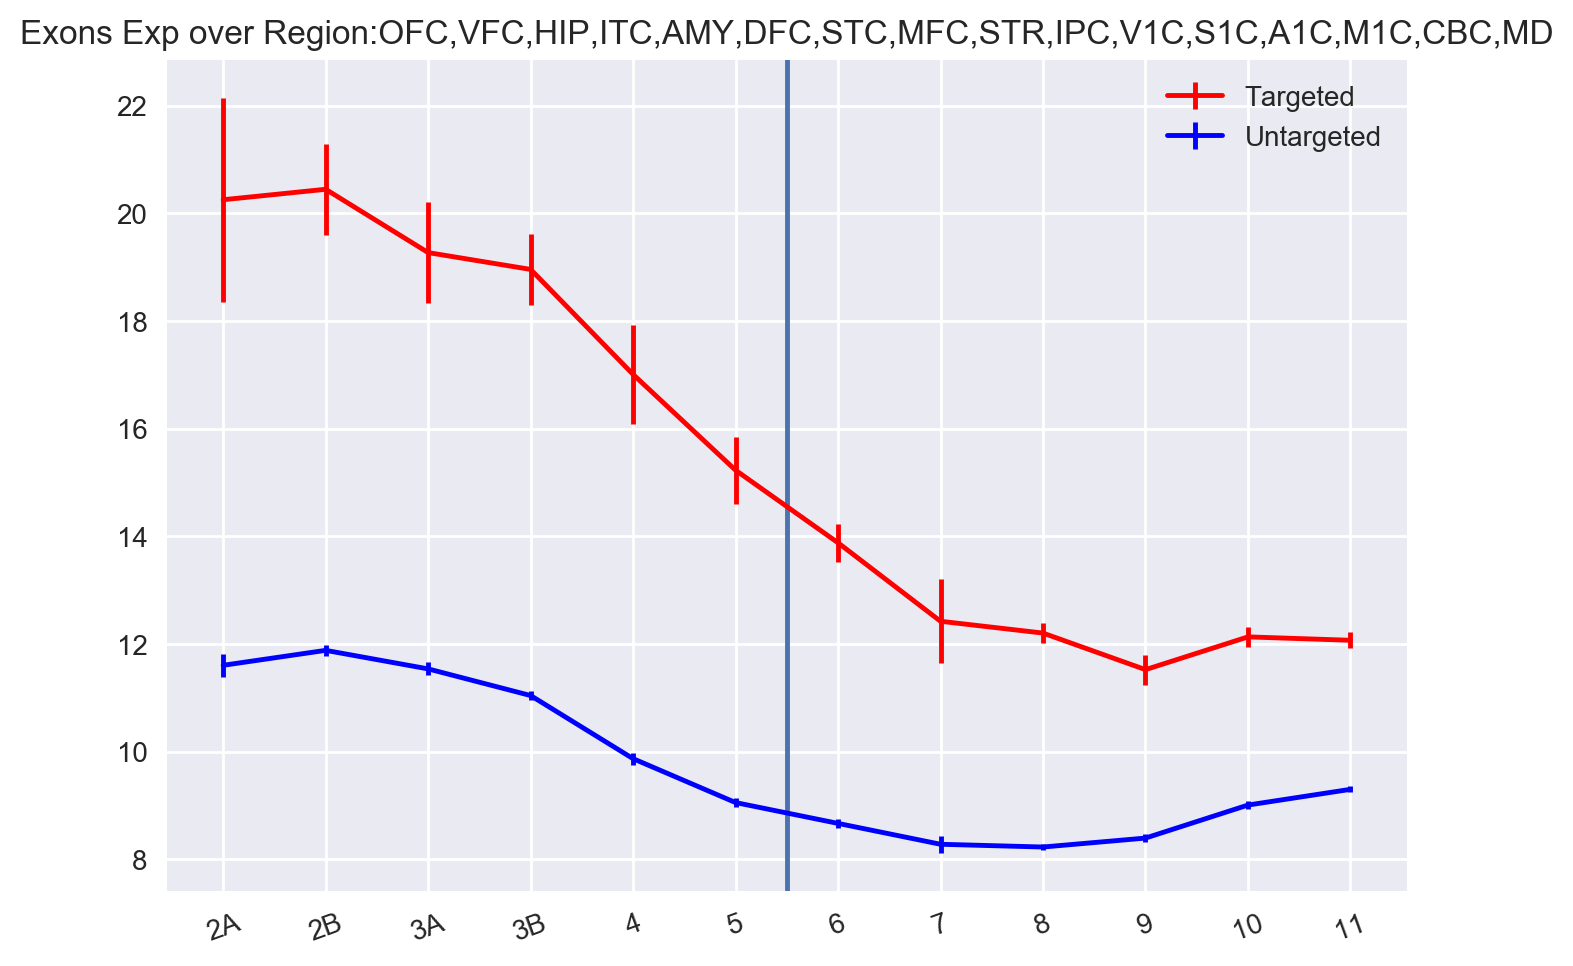

In [94]:
selected_exons = list(bp_exon_row_meta_syn_with_var["row_num"])
selected_exons = random.sample(selected_exons, 615)
Notselected_exons = list(bp_exon_row_meta_syn_without_var["row_num"])
Notselected_exons = random.sample(Notselected_exons, 2000)
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
#lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
#                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

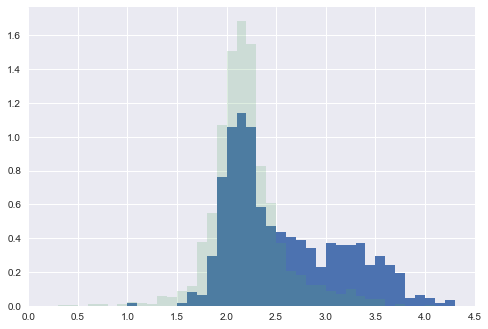

In [95]:
selected_exons_L = list(bp_exon_row_meta_syn_with_var["exon length"])
Notselected_exons_L = list(bp_exon_row_meta_syn_without_var["exon length"])
Notselected_exons_L = random.sample(Notselected_exons_L, 2000)
bins = [x*0.1 for x in xrange(100)]
plt.hist([math.log(x, 10) for x in selected_exons_L], bins=bins, normed=1)
plt.hist([math.log(x, 10) for x in Notselected_exons_L if x !=0], alpha = 0.2, bins=bins, normed=1)
plt.xlim(0, 4.5)
plt.show()

In [96]:
MisVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014ProMIS.xlsx"
mis_annotated_exon_row_meta = ins.AssignVar2Exon2(bp_exon_row_meta, MisVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_mis_with_gene = mis_annotated_exon_row_meta[mis_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_mis_with_gene.to_excel("GenesExonsTargetedByMIS.xlsx", index=False)
bp_exon_row_meta_mis_with_var = bp_exon_row_meta_mis_with_gene[bp_exon_row_meta_mis_with_gene["Vars"]!=""]
bp_exon_row_meta_mis_without_var = bp_exon_row_meta_mis_with_gene[bp_exon_row_meta_mis_with_gene["Vars"]==""]
print bp_exon_row_meta_mis_with_gene.shape, bp_exon_row_meta_mis_with_var.shape, bp_exon_row_meta_mis_without_var.shape

309222(30127, 15) (1583, 15) (28544, 15)


Targeted
Loading records:1582
Untargeted
Loading records:1999


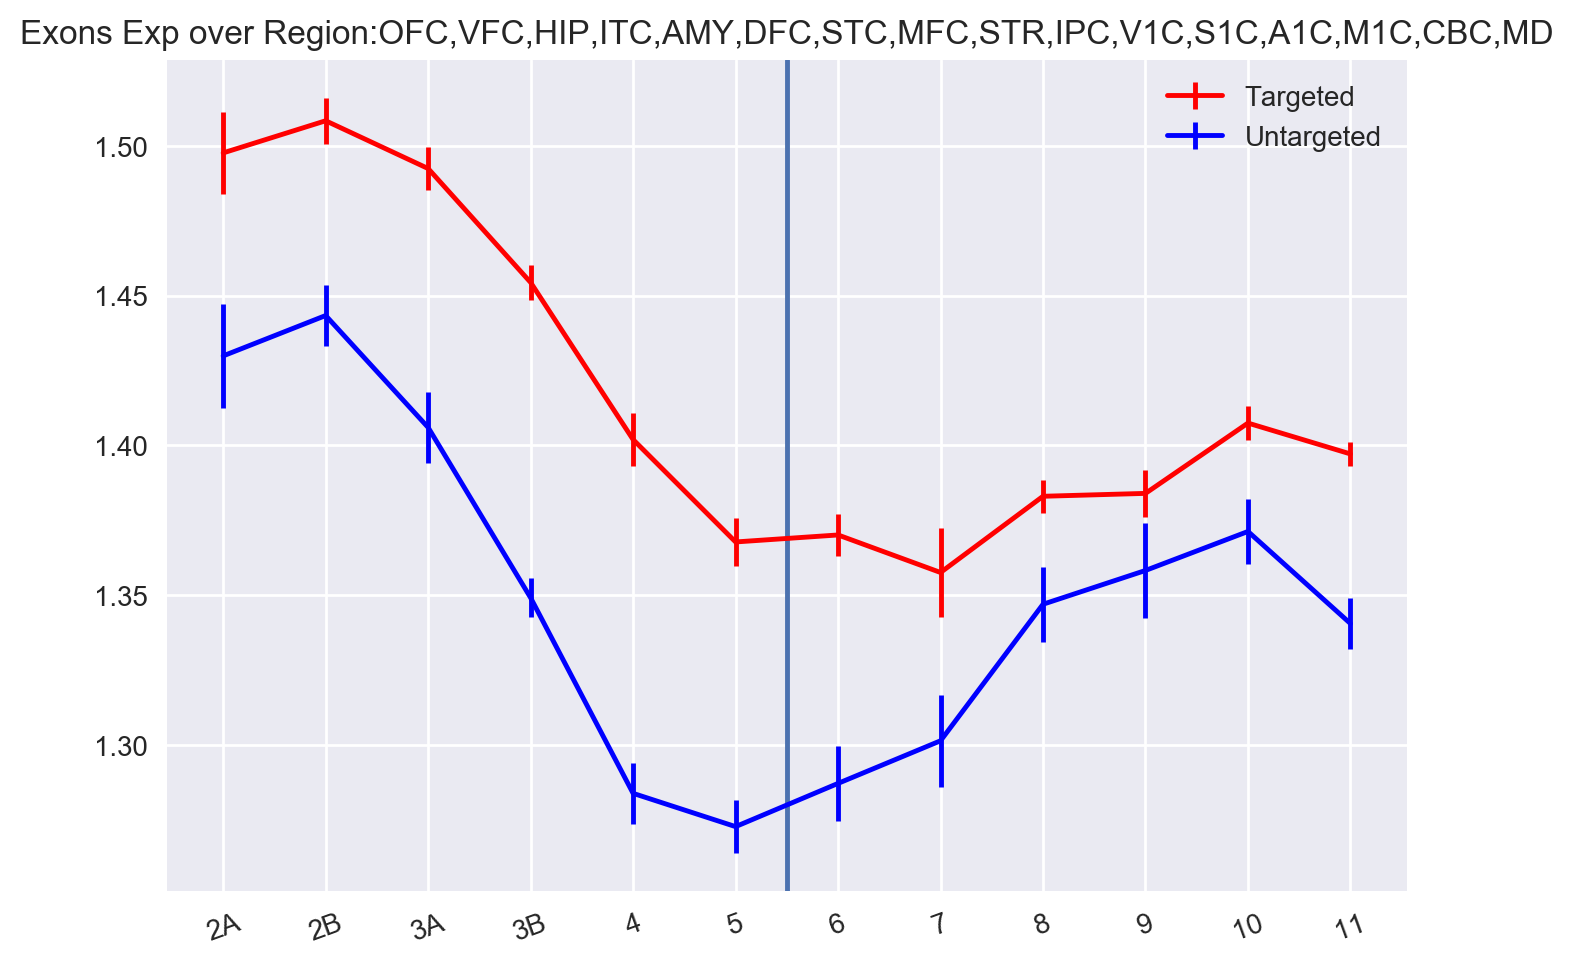

Targeted
Loading records:1582
Untargeted
Loading records:1999


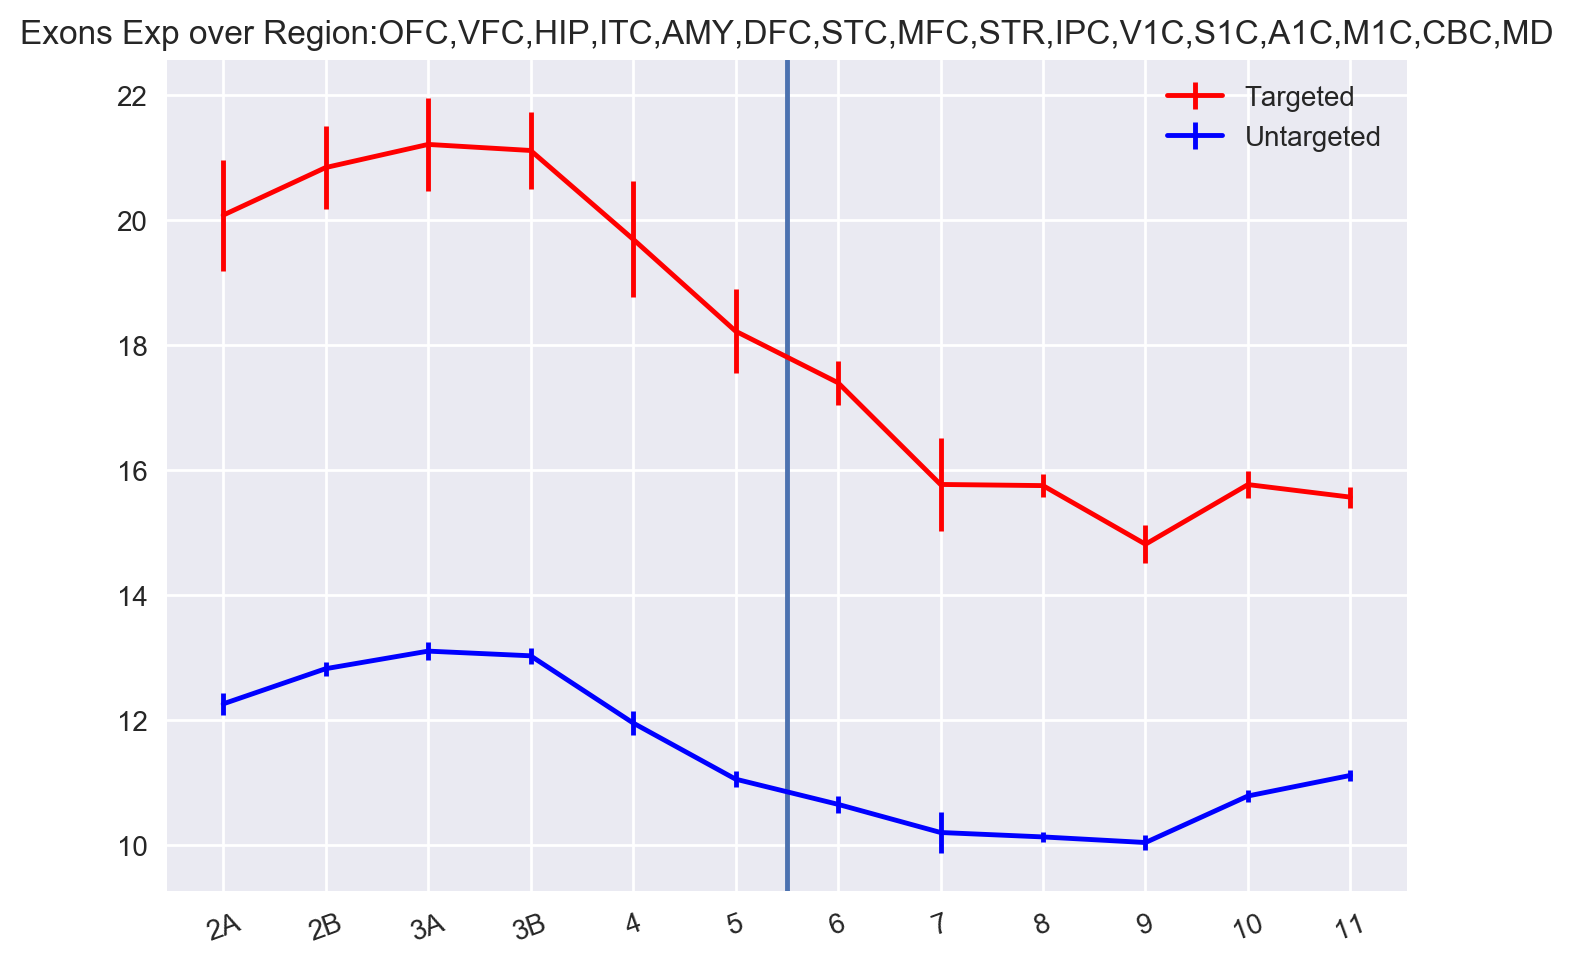

In [104]:
selected_exons = list(bp_exon_row_meta_mis_with_var["row_num"])
selected_exons = random.sample(selected_exons, 1583)
Notselected_exons = list(bp_exon_row_meta_mis_without_var["row_num"])
Notselected_exons = random.sample(Notselected_exons, 2000)
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

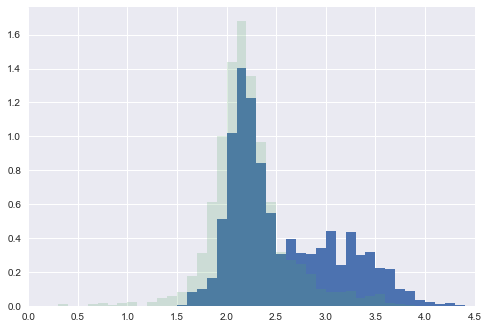

In [98]:
selected_exons_L = list(bp_exon_row_meta_mis_with_var["exon length"])
Notselected_exons_L = list(bp_exon_row_meta_mis_without_var["exon length"])
Notselected_exons_L = random.sample(Notselected_exons_L, 2000)
bins = [x*0.1 for x in xrange(100)]
plt.hist([math.log(x, 10) for x in selected_exons_L], bins=bins, normed=1)
plt.hist([math.log(x, 10) for x in Notselected_exons_L if x !=0], alpha = 0.2, bins=bins, normed=1)
plt.xlim(0, 4.5)
plt.show()

In [99]:
SibNSYNVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014SibNSYN.xlsx"
sibnsyn_annotated_exon_row_meta = ins.AssignVar2Exon2(bp_exon_row_meta, SibNSYNVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_sibnsyn_with_gene = sibnsyn_annotated_exon_row_meta[sibnsyn_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_sibnsyn_with_gene.to_excel("GenesExonsTargetedBySYN.xlsx", index=False)
bp_exon_row_meta_sibnsyn_with_var = bp_exon_row_meta_sibnsyn_with_gene[bp_exon_row_meta_sibnsyn_with_gene["Vars"]!=""]
bp_exon_row_meta_sibnsyn_without_var = bp_exon_row_meta_sibnsyn_with_gene[bp_exon_row_meta_sibnsyn_with_gene["Vars"]==""]
print bp_exon_row_meta_sibnsyn_with_gene.shape, bp_exon_row_meta_sibnsyn_with_var.shape, bp_exon_row_meta_sibnsyn_without_var.shape

309222(23631, 15) (1239, 15) (22392, 15)


Targeted
Loading records:1238
Untargeted
Loading records:1999


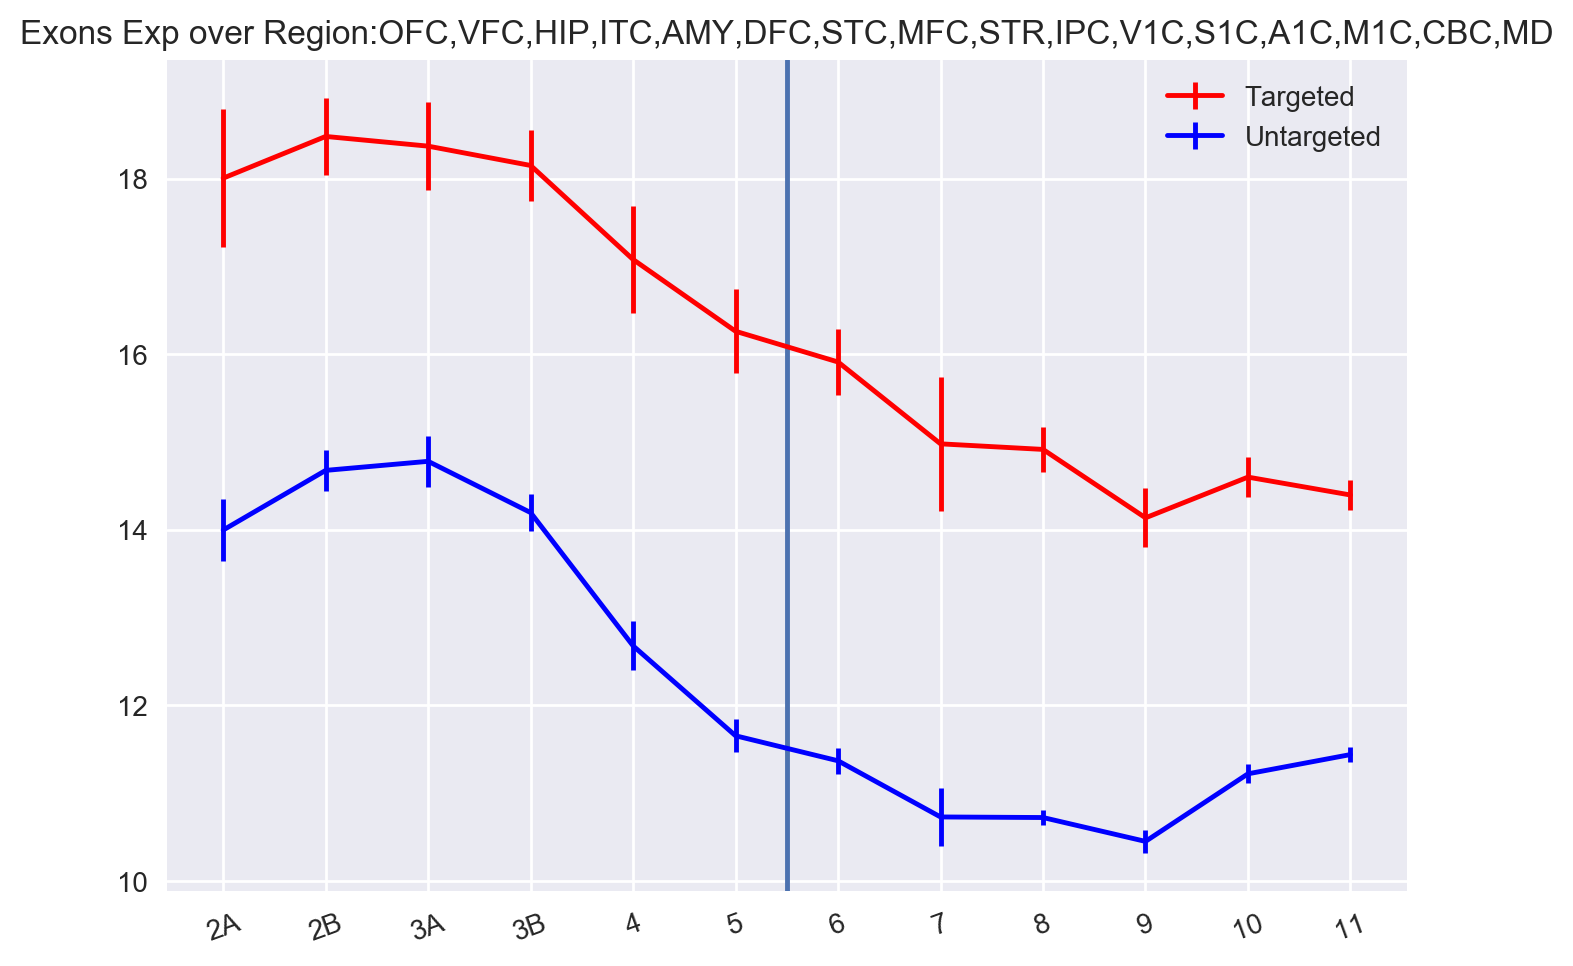

In [100]:
selected_exons = list(bp_exon_row_meta_sibnsyn_with_var["row_num"])
selected_exons = random.sample(selected_exons, 1239)
Notselected_exons = list(bp_exon_row_meta_sibnsyn_without_var["row_num"])
Notselected_exons = random.sample(Notselected_exons, 2000)
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
#lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
#                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

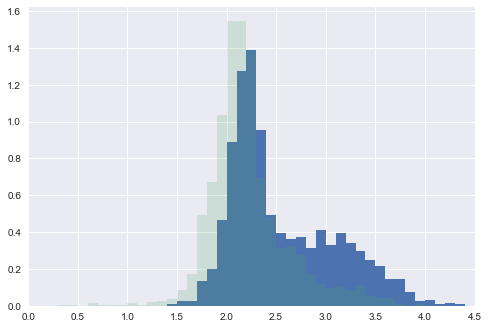

In [101]:
selected_exons_L = list(bp_exon_row_meta_sibnsyn_with_var["exon length"])
Notselected_exons_L = list(bp_exon_row_meta_sibnsyn_without_var["exon length"])
Notselected_exons_L = random.sample(Notselected_exons_L, 2000)
bins = [x*0.1 for x in xrange(100)]
plt.hist([math.log(x, 10) for x in selected_exons_L], bins=bins, normed=1)
plt.hist([math.log(x, 10) for x in Notselected_exons_L if x !=0], alpha = 0.2, bins=bins, normed=1)
plt.xlim(0, 4.5)
plt.show()

In [35]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014ProLGD.xlsx"
bp_exon_row_meta_ProLGD = ins.AssignVar2Exon2(bp_exon_row_meta, VarFile)
bp_exon_row_meta_with_gene = bp_exon_row_meta_ProLGD[bp_exon_row_meta_ProLGD["GeneHited"]=="T"]
bp_exon_row_meta_with_gene.to_excel("GenesExonsTargetedByLGD_wilger2014_predicted.xlsx", index=False)
bp_exon_row_meta_with_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]!=""]
bp_exon_row_meta_without_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]==""]
print bp_exon_row_meta_with_gene.shape, bp_exon_row_meta_with_var.shape, bp_exon_row_meta_without_var.shape

309222(2269, 15) (107, 15) (2162, 15)


Targeted
Loading records:40
Untargeted
Loading records:583


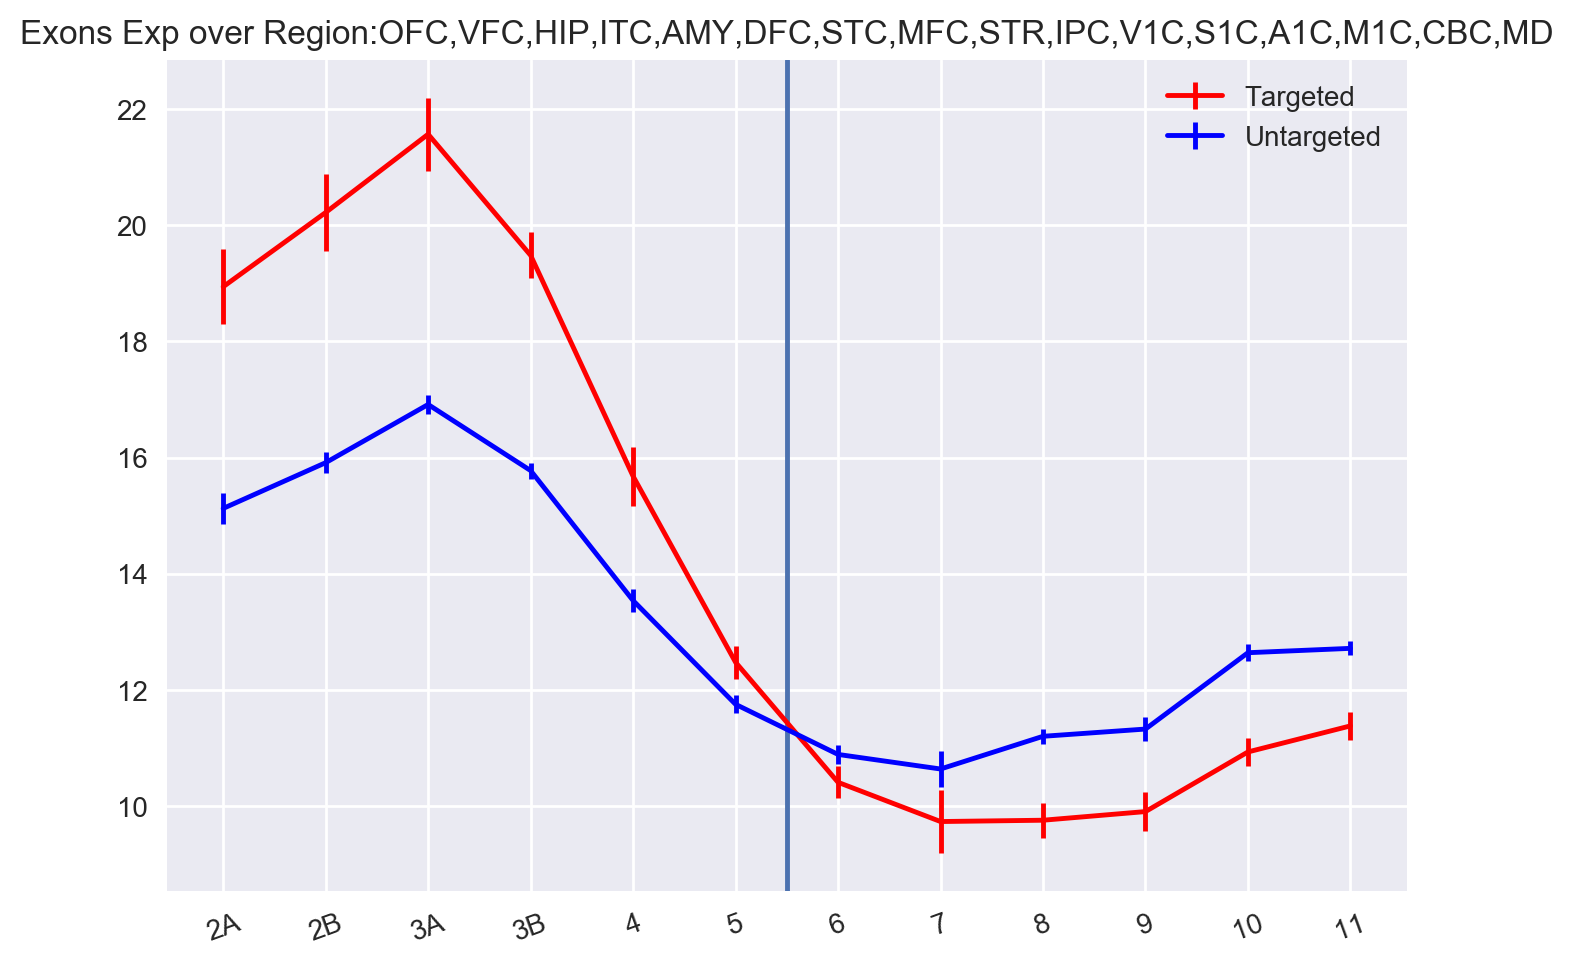

In [102]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
#lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
#                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

In [109]:
selected_exons_L = list(bp_exon_row_meta_with_var["exon length"])
Notselected_exons_L = list(bp_exon_row_meta_without_var["exon length"])
Notselected_exons_L = random.sample(Notselected_exons_L, 2583)
bins = [x*0.1 for x in xrange(100)]
plt.hist([math.log(x, 10) for x in selected_exons_L], bins=bins, normed=1)
plt.hist([math.log(x, 10) for x in Notselected_exons_L if x !=0], alpha = 0.2, bins=bins, normed=1)
plt.xlim(0, 4.5)
plt.show()

ValueError: sample larger than population

In [107]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014RecProLGD.xlsx"
bp_exon_row_meta_RecProLGD = ins.AssignVar2Exon2(bp_exon_row_meta, VarFile)
bp_exon_row_meta_with_Recgene = bp_exon_row_meta_RecProLGD[bp_exon_row_meta_RecProLGD["GeneHited"]=="T"]
bp_exon_row_meta_with_Recgene.to_excel("RecGenesExonsTargetedByLGD_wilger2014_predicted.xlsx", index=False)
bp_exon_row_meta_with_var = bp_exon_row_meta_with_Recgene[bp_exon_row_meta_with_Recgene["Vars"]!=""]
bp_exon_row_meta_without_var = bp_exon_row_meta_with_Recgene[bp_exon_row_meta_with_Recgene["Vars"]==""]
print bp_exon_row_meta_with_Recgene.shape, bp_exon_row_meta_with_var.shape, bp_exon_row_meta_without_var.shape

309222(625, 15) (45, 15) (580, 15)


Targeted
Loading records:44
Untargeted
Loading records:579


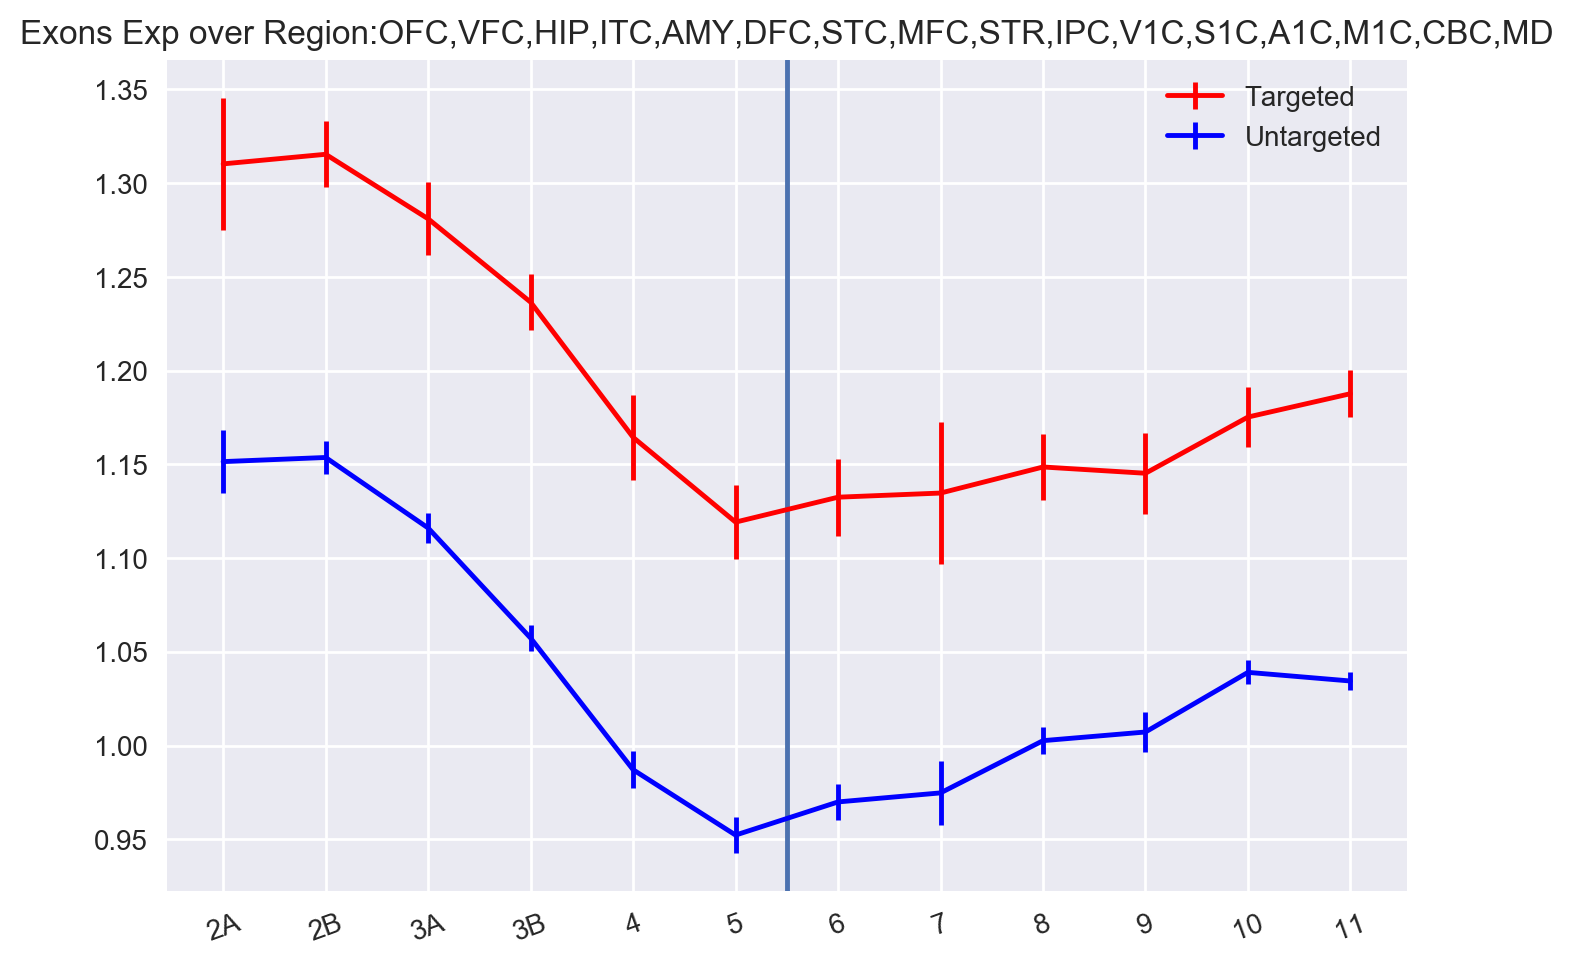

Targeted
Loading records:44
Untargeted
Loading records:579


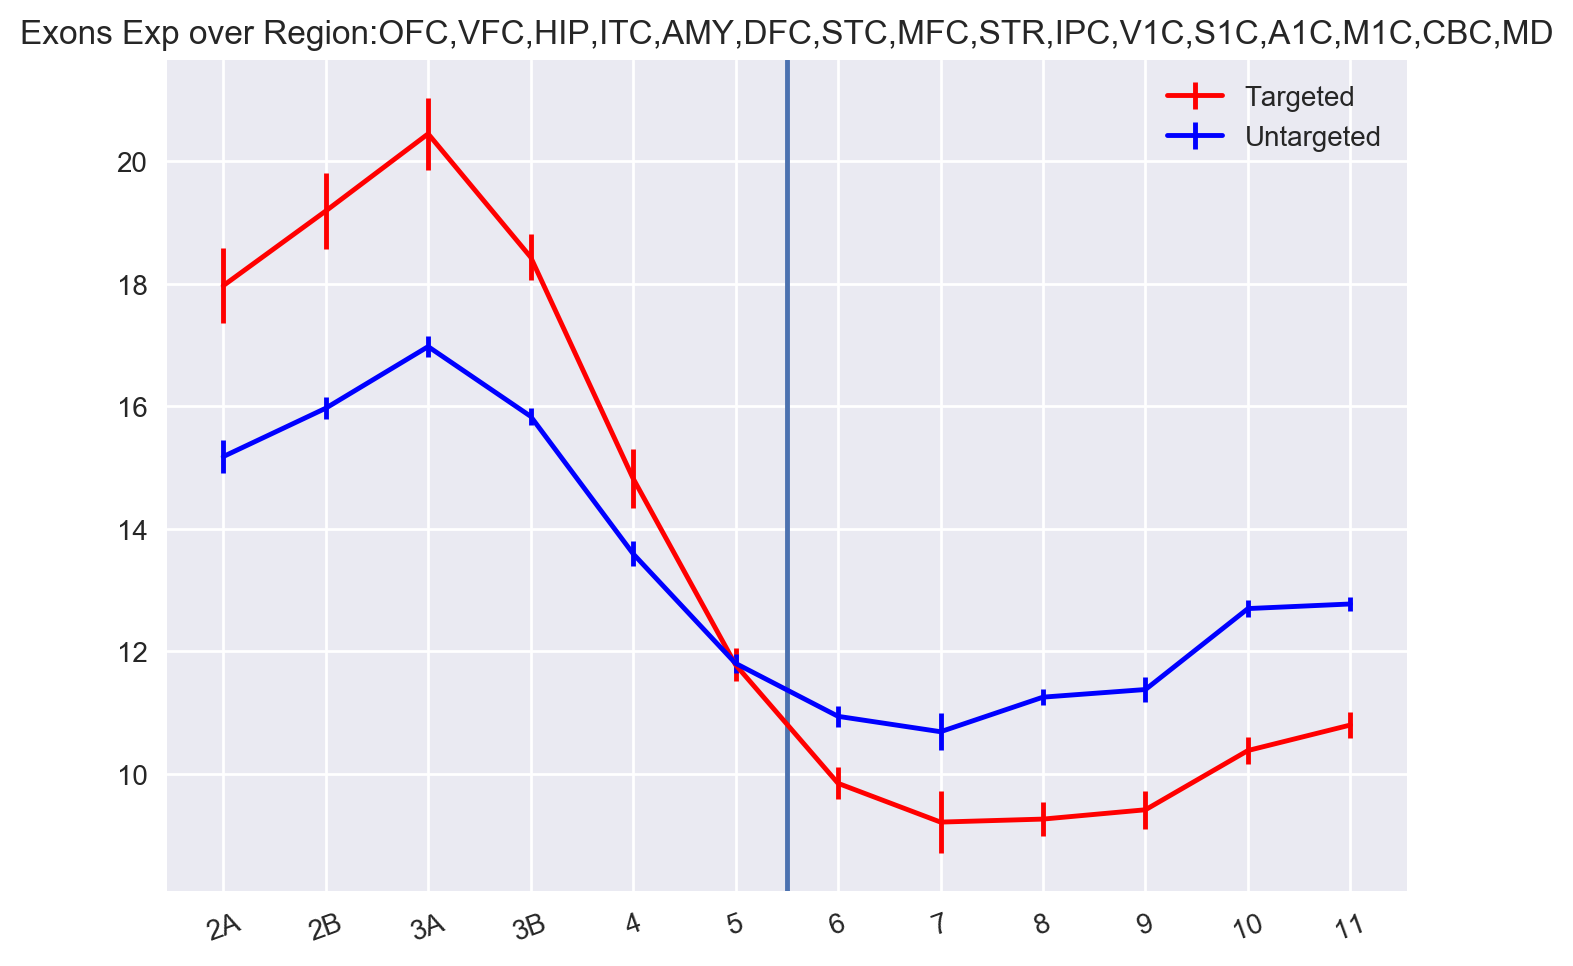

In [108]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

psd_Target_exon
Loading records:3
chromatin_Target_exon
Loading records:13
channel_Other_exon
Loading records:36
channel_Target_exon
Loading records:3
sig_skel_Other_exon
Loading records:10
psd_Other_exon
Loading records:56
sig_skel_Target_exon
Loading records:1
chromatin_Other_exon
Loading records:156


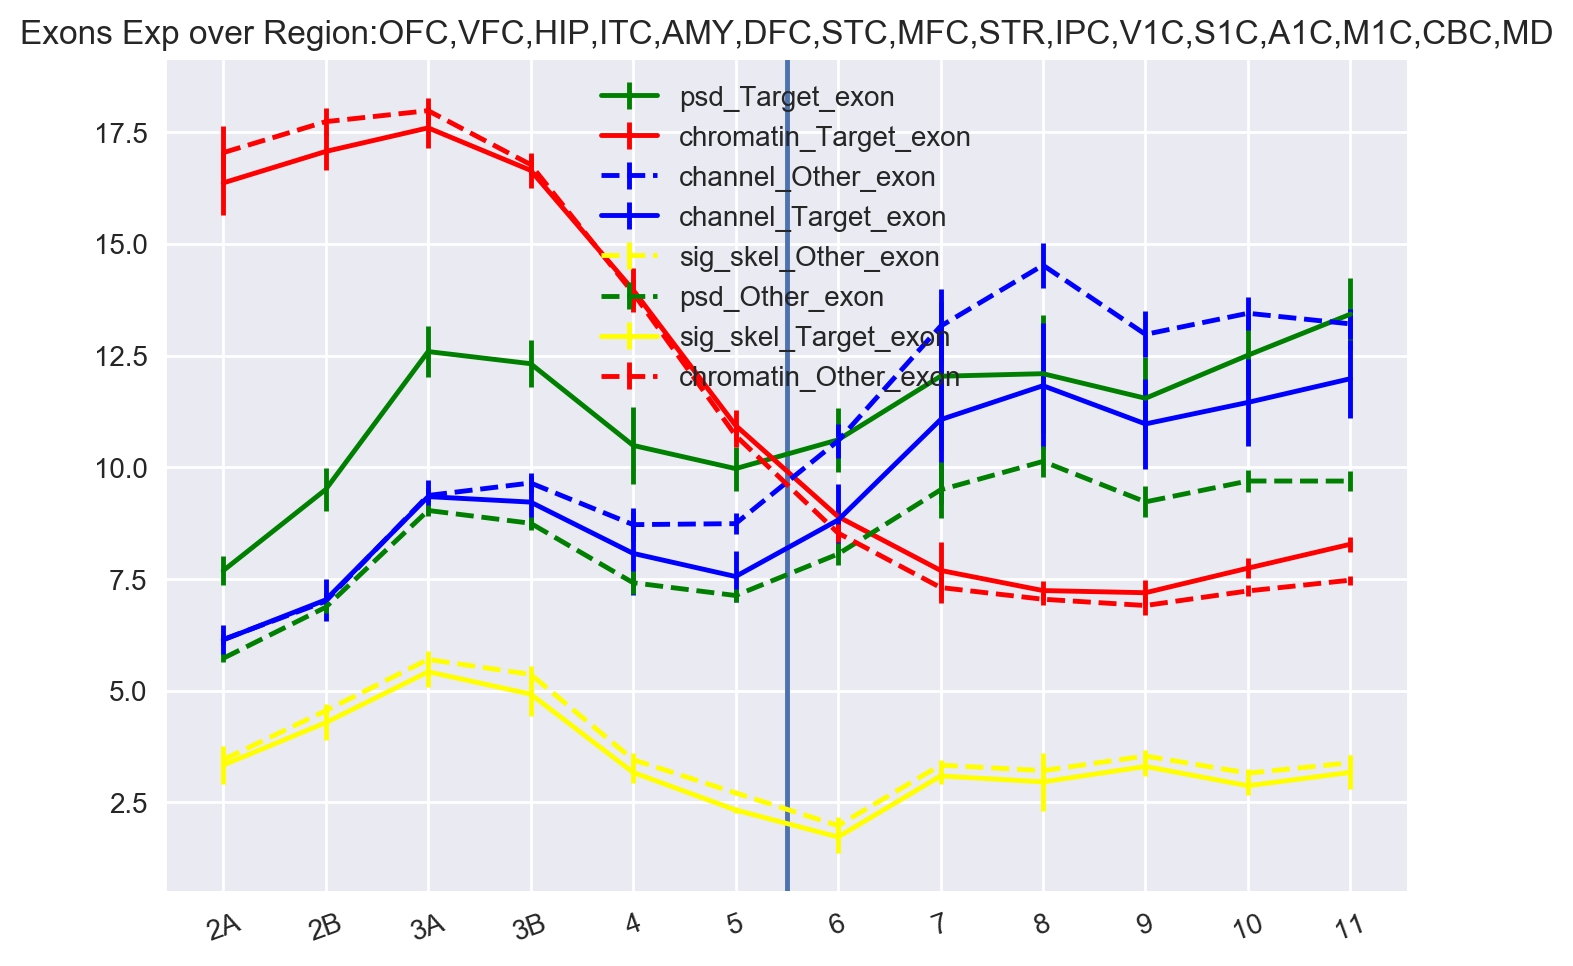

psd_Target_exon
Loading records:3
chromatin_Target_exon
Loading records:13
channel_Other_exon
Loading records:36
channel_Target_exon
Loading records:3
sig_skel_Other_exon
Loading records:10
psd_Other_exon
Loading records:56
sig_skel_Target_exon
Loading records:1
chromatin_Other_exon
Loading records:156


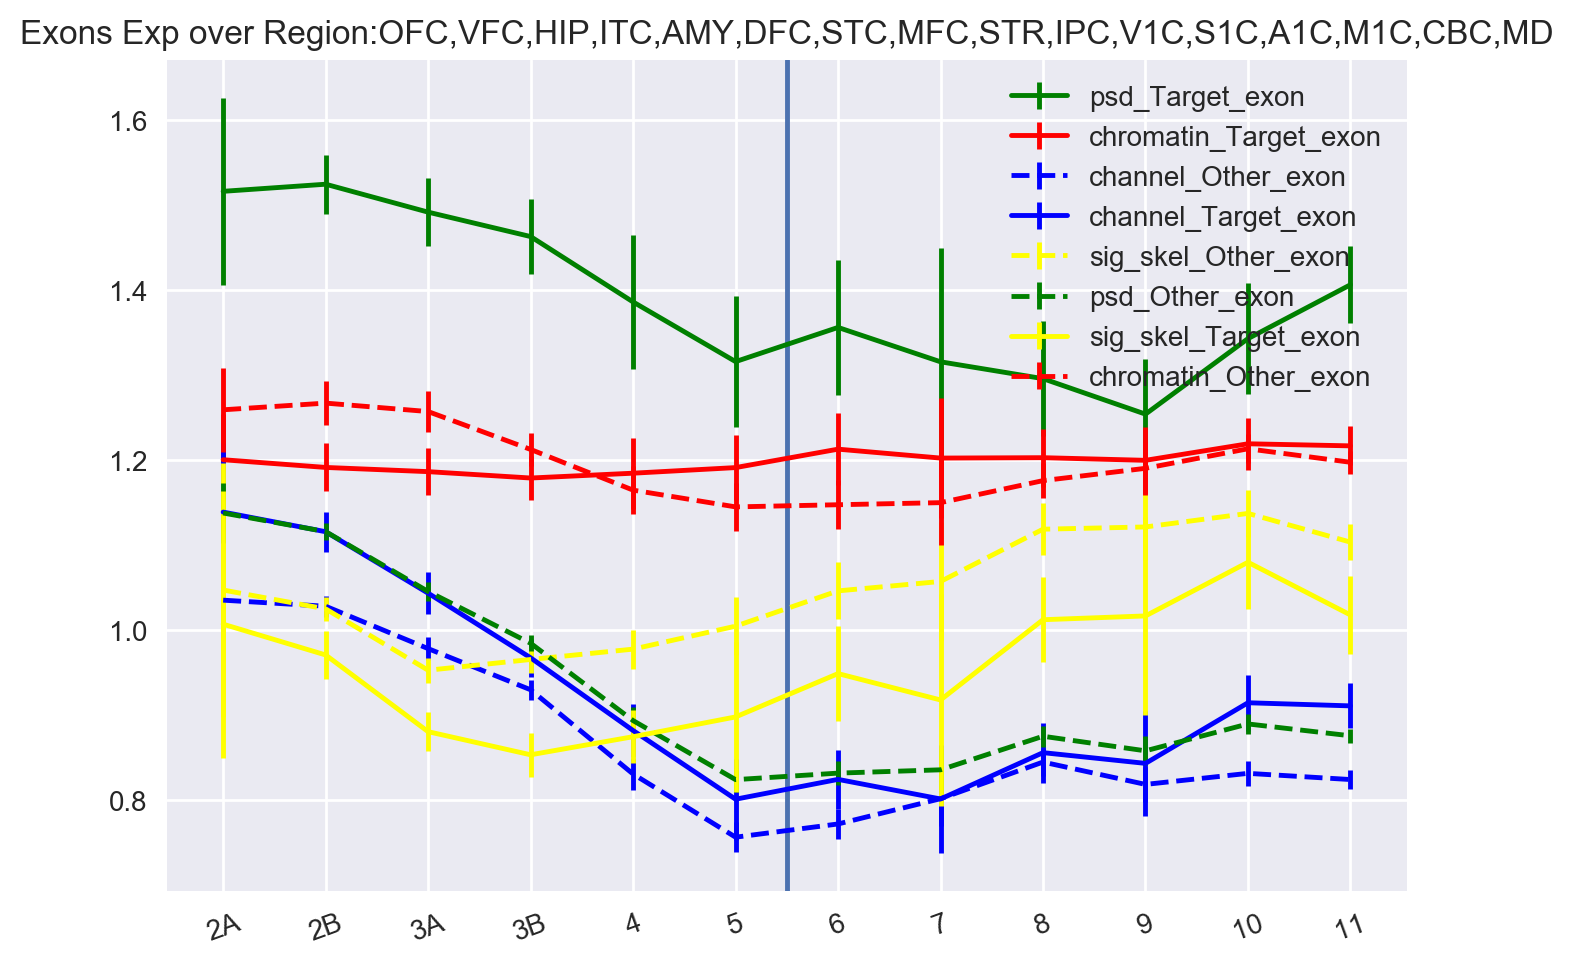

In [93]:
cates = {}
color=["red", "blue", "yellow", "green"]
for i,func in enumerate(["chromatin", "channel", "sig_skel", "psd"]):
    cates[func+"_Target_exon"] = (color[i], 
                    list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var.Func.str.contains(func)]["row_num"]))
    cates[func+"_Other_exon"] = (color[i], 
                    list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var.Func.str.contains(func)]["row_num"]))
ins.LookALLMutationTargetedExon(cates, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)
ins.LookALLMutationTargetedExon(cates, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)

FemaleExons
Loading records:10
MaleExons
Loading records:31
MaleGenesOtherExons
Loading records:530
FemaleGenesOtherExons
Loading records:192


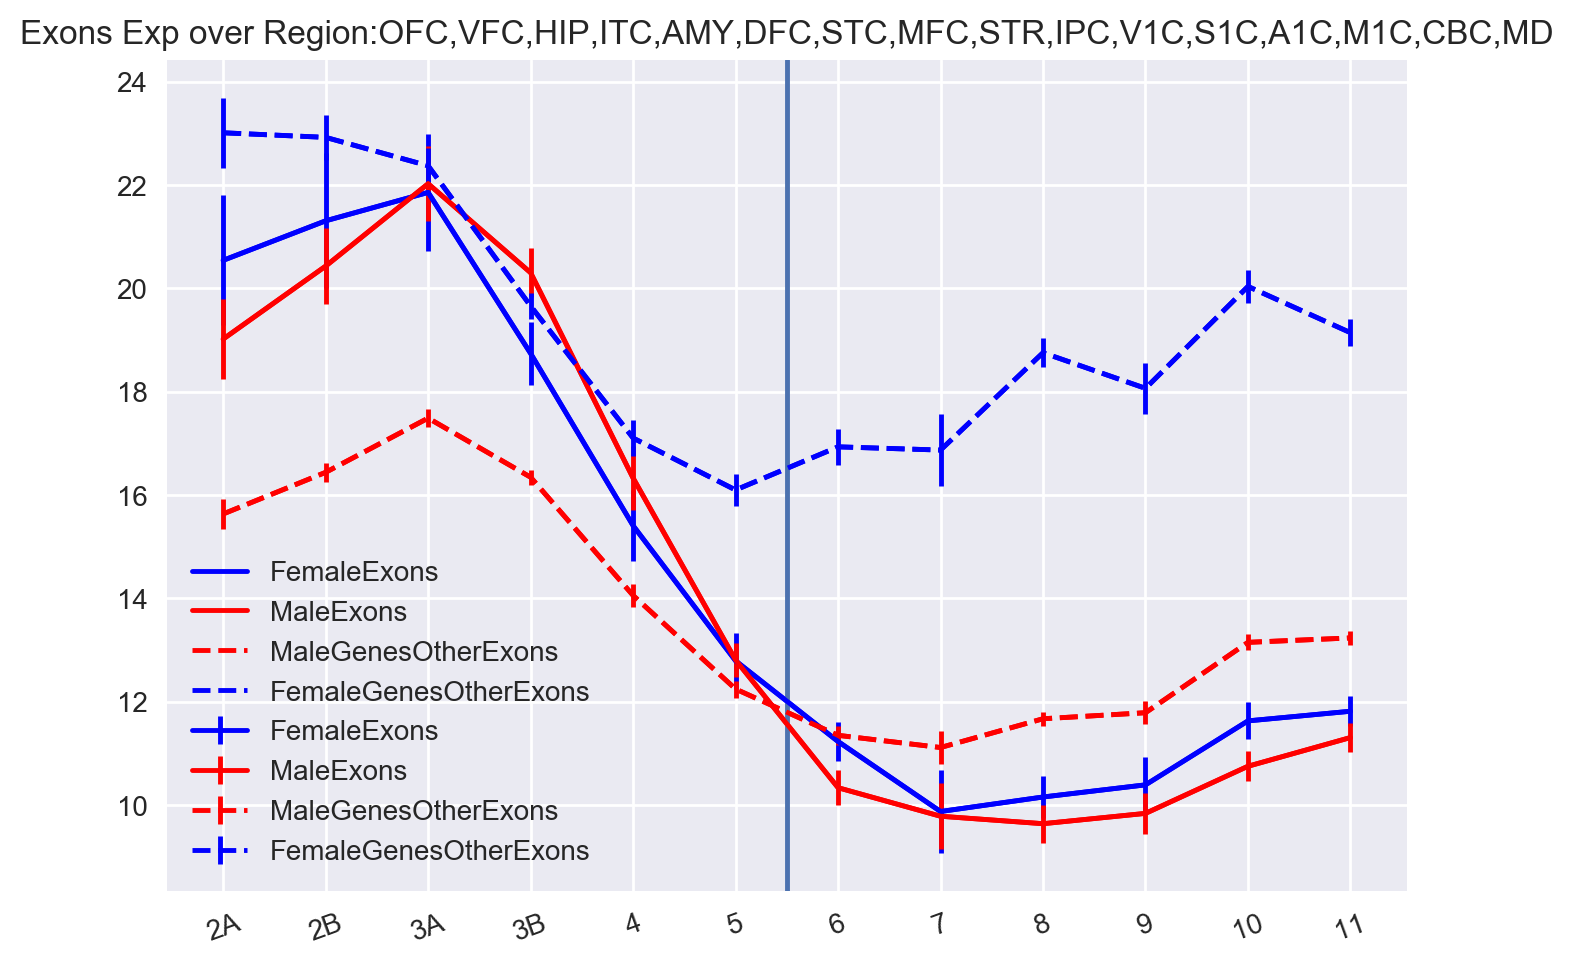

In [73]:
#display(bp_exon_row_meta_with_var.head())
Male_exons = ("red", list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pM", "pM;pM","pM;pF"])]["row_num"]))
FeMale_exons = ("blue", list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pF","pM;pF"])]["row_num"]))
Male_genes = list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pM", "pM;pM","pM;pF"])]["gene_symbol"])
FeMale_genes = list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pF","pM;pF"])]["gene_symbol"])
Male_unTexons = ("red", list(bp_exon_row_meta_without_var[
    bp_exon_row_meta_without_var["gene_symbol"].isin(Male_genes)]["row_num"]))
FeMale_unTexons = ("blue", list(bp_exon_row_meta_without_var[
    bp_exon_row_meta_without_var["gene_symbol"].isin(FeMale_genes)]["row_num"]))
Male_FeMale = dict(zip(["MaleExons", "FemaleExons", "MaleGenesOtherExons", "FemaleGenesOtherExons"],
                       [Male_exons, FeMale_exons, Male_unTexons, FeMale_unTexons]))
#print Male_FeMale
#ins.LookALLMutationTargetedExon(Male_FeMale, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)
ins.LookALLMutationTargetedExon(Male_FeMale, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

True